In [1]:
from railway import *

# Load model

# Define problem parameters
P = 2000
K = 3
timelimit = 60

# N = 10; J = 10; T = 10  #    1
# N = 10; J = 10; T = 50  #    2
# N = 10; J = 10; T = 100 #    3
# N = 10; J = 40; T = 10  #    4
# N = 10; J = 40; T = 50  #    5
# N = 10; J = 40; T = 100 #    6
# N = 10; J = 80; T = 10  #    7
# N = 10; J = 80; T = 50  #    8
# N = 10; J = 80; T = 100 #    9
# N = 20; J = 10; T = 10  #   10
# N = 20; J = 10; T = 50  #   11
# N = 20; J = 10; T = 100 #   12
# N = 20; J = 40; T = 10  #   13
# N = 20; J = 40; T = 50  #   14
# N = 20; J = 40; T = 100 #   15
# N = 20; J = 80; T = 10  #   16
# N = 20; J = 80; T = 50  #   17
# N = 20; J = 80; T = 100 #   18
# N = 40; J = 10; T = 10  #   19
# N = 40; J = 10; T = 50  #   20
# N = 40; J = 10; T = 100 #   21
# N = 40; J = 40; T = 10  #   22
# N = 40; J = 40; T = 50  #   23
# N = 40; J = 40; T = 100 #   24
# N = 40; J = 80; T = 10  #   25
# N = 40; J = 80; T = 50  #   26
N = 40; J = 80; T = 100 #   27

# Name of the file to load
FILENAME = f"../datasets/railway_N{N}_T{T}_J{J}_P{P}_K{K}.json"

# Instantiate the Railway object
model = Railway.load(FILENAME)

# Set up the three models by (deep) copying the blueprint model
model0 = Railway.copy(model)
model1 = Railway.copy(model)
# model2 = Railway.copy(model)


Set parameter Username
Set parameter LicenseID to value 2629256
Academic license - for non-commercial use only - expires 2026-02-27


In [2]:
# Model 0: "as-is" Gurobi model with no heuristics or cuts
print("\nModel 0\n")
# model0.model.setParam('OutputFlag', 0) # verbose
model0.model.setParam('TimeLimit', timelimit) # time limit
model0.model.setParam('LPWarmStart', 0)
model0.model.setParam('PoolSolutions', 1)
model0.model.setParam('Cuts', 0)
model0.model.setParam('CutPasses', 0)
model0.model.setParam('Heuristics', 0)
model0.model.setParam('Symmetry', 0)
model0.model.setParam('Threads', 1)
model0.model.setParam('Presolve', 1)

model0.set_constraints()
model0.set_objective()

results0 = model0.optimize()

print('-----------------------------------')
print(f'Status: {model0.get_status()}')
print("Runtime:", results0['runtime'])
print("Gap:", results0['gap'])
print("Objective value:", results0['obj'])


Model 0

Set parameter TimeLimit to value 60
Set parameter LPWarmStart to value 0
Set parameter PoolSolutions to value 1
Set parameter Cuts to value 0
Set parameter CutPasses to value 0
Set parameter Heuristics to value 0
Set parameter Symmetry to value 0
Set parameter Threads to value 1
Set parameter Presolve to value 1
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads

Non-default parameters:
TimeLimit  60
LPWarmStart  0
Heuristics  0
Symmetry  0
Cuts  0
CutPasses  0
Presolve  1
Threads  1
PoolSolutions  1

Optimize a model with 1397860 rows, 804000 columns and 3842583 nonzeros
Model fingerprint: 0x2f92bc80
Variable types: 238000 continuous, 566000 integer (566000 binary)
Coefficient statistics:
  Matrix range     [2e-02, 2e+08]
  Objective range  [1e+03, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RH

In [3]:
# Model 1: model with simulated annealing heuristic
print("\nModel 1\n")
# model1.model.setParam('OutputFlag', 0) # verbose
model1.model.setParam('TimeLimit', timelimit) # time limit
# model1.model.setParam('LPWarmStart', 0)
model1.model.setParam('PoolSolutions', 1)
model1.model.setParam('Cuts', 0)
model1.model.setParam('CutPasses', 0)
model1.model.setParam('Heuristics', 0)
model1.model.setParam('Symmetry', 0)
model1.model.setParam('Threads', 1)
model1.model.setParam('Presolve', 1)


Model 1

Set parameter TimeLimit to value 60
Set parameter PoolSolutions to value 1
Set parameter Cuts to value 0
Set parameter CutPasses to value 0
Set parameter Heuristics to value 0
Set parameter Symmetry to value 0
Set parameter Threads to value 1
Set parameter Presolve to value 1


In [ ]:
# def dispS(S):
#     """Display the solution."""
#     for key, value in S.items():
#         print(f"J {key:2d} | t {value:2d}")

# S = model1.generate_initial_solution()
# dispS(S)
# _, _, _, _, v = model1.get_vars_from_times(S)
# f = model1.get_objective_value(v)
# print(f)

# print()
# S_new = model1.generate_neighbor_solution(S)
# dispS(S_new)
# _, _, _, _, v_new = model1.get_vars_from_times(S_new)
# f_new = model1.get_objective_value(v_new)
# print(f_new)

J  1 | t  1
J  2 | t  1
J  3 | t  1
J  4 | t  1
J  5 | t  1
J  6 | t  1
J  7 | t  1
J  8 | t  1
J  9 | t  2
J 10 | t  1
2205.564909737893

J  1 | t  1
J  2 | t  1
J  3 | t  4
J  4 | t  1
J  5 | t  1
J  6 | t  1
J  7 | t  1
J  8 | t  1
J  9 | t  2
J 10 | t  1
2295.3360785734917


8.641189098358154
13.290399551391602
17.862764596939087
22.46065616607666
27.145978689193726
31.79450535774231
36.364391803741455
40.91309428215027
45.53978943824768
50.10756325721741
54.81120252609253
59.47572731971741
64.25181198120117
69.07170414924622
73.92362856864929
78.67456436157227
83.42224478721619
88.3446786403656
93.12230253219604
97.82515263557434
102.5824933052063
107.34325933456421
112.13292217254639
116.9879503250122
121.84506440162659
126.60016894340515
131.56762599945068
136.3591856956482
141.06772589683533
145.79962253570557
150.52197241783142
155.38751816749573
160.19061970710754
164.85400533676147
169.5784089565277
174.55361437797546
179.40871262550354
184.54032158851624
Total number of iterations:	38
Initial solution with SA:	{1: 20, 2: 1, 3: 9, 4: 1, 5: 47, 6: 1, 7: 90, 8: 78, 9: 1, 10: 1, 11: 1, 12: 1, 13: 8, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 38, 20: 1, 21: 1, 22: 44, 23: 1, 24: 68, 25: 51, 26: 72, 27: 51, 28: 1, 29: 53, 30: 1, 31: 1, 32: 44, 33: 1, 34: 88,

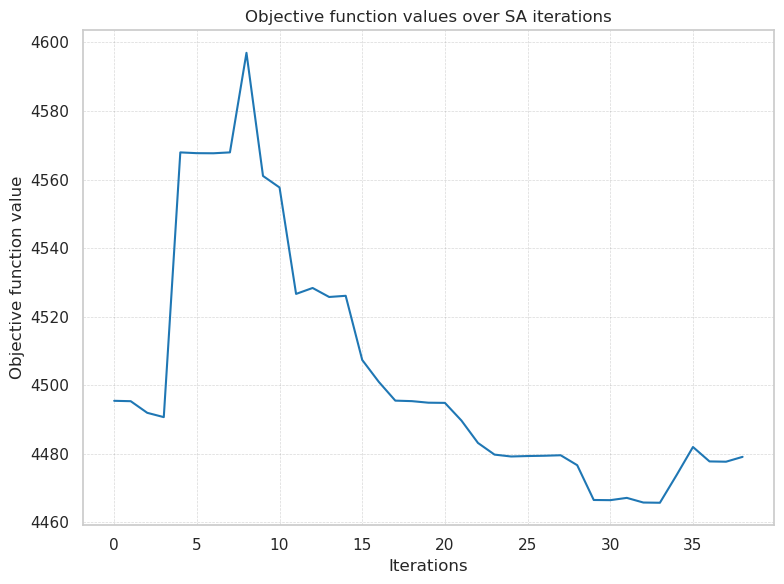

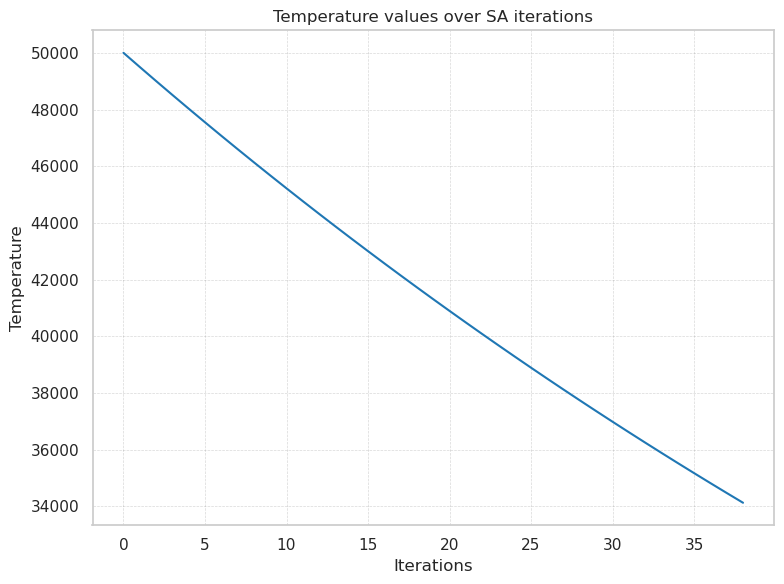

In [6]:
# Simulated annealing (SA) for intial solution generation

# First of all we set the parameters for the SA algorithm
T = 50_000
c = 0.99
L = 1
max_time = 180
max_iter = 10000

# Start timing
import time
import numpy as np
start_time = time.time()
elapsed_time = time.time() - start_time

# Then we initialize a starting solution and the iteration counter
S = model1.generate_initial_solution()
iter = 0

# We also initialize a list to store the values of the objective function
_, _, _, _, v = model1.get_vars_from_times(S)
objective_values = [model1.get_objective_value(v)]
temperatures = [T]

# Simulated annealing (SA) algorithm
while (T > 1e-6) and (iter < max_iter) and (elapsed_time < max_time):
    for _ in range(L):
        # Generate a new (neighbor) solution
        S_new = model1.generate_neighbor_solution(S)

        # If no solution is generated, skip the iteration
        if S_new is None: 
            print('!!! NO Snew !!!')
            continue

        # Get the solutions' variables
        _, _, _, _, v = model1.get_vars_from_times(S)
        _, _, _, _, v_new = model1.get_vars_from_times(S_new)

        # Compute the objective function values
        f = model1.get_objective_value(v)
        f_new = model1.get_objective_value(v_new)

        # Accept solution if it's better or with a certain probability
        if f_new <= f:
            S = S_new
            objective_values.append(f_new)
        else:
            p = np.exp((f - f_new) / T)
            if np.random.rand() < p:
                S = S_new
                objective_values.append(f_new)
            else:
                S = S
                objective_values.append(f)

    # Cool down the temperature
    T *= c
    temperatures.append(T)

    # Increment the iteration counter
    iter += 1

    # Time check
    elapsed_time = time.time() - start_time
    print(elapsed_time)
 
# Final solution with SA
print(f"Total number of iterations:\t{iter}")
print(f"Initial solution with SA:\t{S}")
print(f"Objective value of initial solution:\t{objective_values[-1]}")

# Import and set style for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    style="whitegrid",
    palette="tab10",
    rc={
        "grid.linestyle": "--",
        "grid.color": "gray",
        "grid.alpha": 0.3,
        "grid.linewidth": 0.5,
    },
)

print('T', T)
print('Elapsed time', elapsed_time)
print('Iter', iter)

# Plot the objective function values
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(len(objective_values)), y=objective_values)
plt.title("Objective function values over SA iterations")
plt.xlabel("Iterations")
plt.ylabel("Objective function value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the temperature values
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(len(temperatures)), y=temperatures)
plt.title("Temperature values over SA iterations")
plt.xlabel("Iterations")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Solve Model 1
model1.set_solution(S)

model1.set_constraints()
model1.set_objective()

results1 = model1.optimize()
SAtime = elapsed_time

print('-----------------------------------')
print(f'Status: {model1.get_status()}')
print("Simulated Annealing time:", SAtime)
print("Runtime:", results1['runtime'])
print("Total time:", SAtime + results1['runtime'])
print("Gap:", results1['gap'])
print("Objective value:", results1['obj'])

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Arch Linux")

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 1 threads

Non-default parameters:
TimeLimit  60
Heuristics  0
Symmetry  0
Cuts  0
CutPasses  0
Presolve  1
Threads  1
PoolSolutions  1

Optimize a model with 1397860 rows, 804000 columns and 3842583 nonzeros
Model fingerprint: 0x434abeac
Variable types: 238000 continuous, 566000 integer (566000 binary)
Coefficient statistics:
  Matrix range     [2e-02, 2e+08]
  Objective range  [1e+03, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-02, 2e+08]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

User MIP start produced solution with objective 4479.13 (0.99s)
Loaded user MIP start with objective 4479.13

Presolve removed 1328259 rows and 747380 columns
Presolve time: 2.08s
Presolved: 69601 row

In [ ]:
# # Model 2: Full model plus valid inequalities and cutting planes
# print("\nModel 2\n")
# # model2.model.setParam('OutputFlag', 0) # verbose
# model2.model.setParam('TimeLimit', 30) # time limit

# S = model2.simulated_annealing()
# model2.set_solution(S)

# model2.set_constraints()
# model2.set_objective()

# model2.set_valid_inequalities()
# model2.set_cutting_planes()

# results2 = model2.optimize()
# # print("Runtime:", results2['runtime'])
# # print("Gap:", results2['mip_gap'])
# # print("Objective value:", results2['obj_val'])